# Forward Euler family

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def exact_solution(time):
    uExact=exp(cos(2*pi*time)-.25*time-1)
    vExact=-(2*pi*sin(2*pi*time))*exp(cos(2*pi*time)-.25*time-1)
    return uExact,vExact

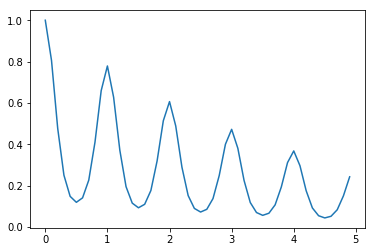

In [3]:
h=.1
tInitial,tFinal=0,5
tExact=arange(tInitial,tFinal,h)
uExact=zeros((len(tExact),1))
vExact=zeros((len(tExact),1))
for i in range (len(tExact)):
    uExact[i],vExact[i]=exact_solution(tExact[i])
plot(tExact,uExact)

# A simple Ode solver

In [4]:
def func(t):
    c=(0.25 + 2*pi*sin(2*pi*t))
    return c

In [5]:
def my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros(nSteps)
    v=zeros(nSteps)
    u[0]=uo
    v[0]=-.25
    for i in range(nSteps-1):
        v[i+1] = -func(time[i+1]) * (u[i] + deltaT * (1 - gamma) * v[i]) /(1 + gamma * deltaT*func(time[i+1]))
        u[i+1] = u[i] + deltaT * ( (1 - gamma) * v[i] + gamma * v[i+1] )
    return time,u,v


In [6]:
uo=1
tInitial,tFinal=0,5
deltaT=.001
gamma=1
tB,uB,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma)
gamma=0
tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma)


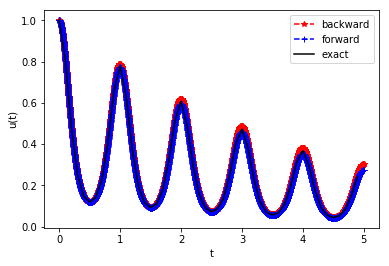

In [7]:
plot(tB,uB,'r*--')
plot(tF,uF,'b+--')
plot(tExact,uExact,'k')
xlabel('t')
ylabel('u(t)')
legend(["backward","forward","exact"])

# order of convergence

In [8]:
starting_dt,nsteps,ratio=2,5,2
dt=zeros((nsteps,1))
for i in range(nsteps):
    dt[i]=starting_dt/ratio**(i)
print(dt)

[[2.   ]
 [1.   ]
 [0.5  ]
 [0.25 ]
 [0.125]]


In [9]:
def generateError(uo,tInitial,tFinal,dt,gamma):
    data=zeros((nsteps,3))
    for i in range (nsteps):
        current_deltat=dt[i]
        tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,current_deltat,gamma)
        uExact,vExact=exact_solution(tF[len(tF)-1])
        data[i,:]=[current_deltat,uF[len(tF)-1]-uExact,vF[len(tF)-1]-vExact]
        return data
    
def errorAnalysis(myData,debug):
    if debug:
        print("Absolute error =\n")
        print(myData)
    plot(myData[:,0],abs(myData[:,1]))
    xlabel("dt")
    ylabel("|u_num(T) - u_exact(T)|")
    title("Variation of absolute error with time-step")
    show()

In [10]:
def errorAnalysis(myData,debug):
    if debug:
        print("Absolute error =\n")
        print(myData)
    plot(myData[:,0],abs(myData[:,1]))
    xlabel("dt")
    ylabel("|u_num(T) - u_exact(T)|")
    title("Variation of absolute error with time-step")
    show()
    num = log(abs(myData[nsteps-1,1])) - log(abs(myData[nsteps-2,1]))
    denom = log(abs(myData[nsteps-1,0])) - log(abs(myData[nsteps-2,0]))
    rate_of_convergence = num / denom
    print("\nrate of convergence = ", rate_of_convergence)

Absolute error =

[[ 2.          0.07316614 -0.07407407]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


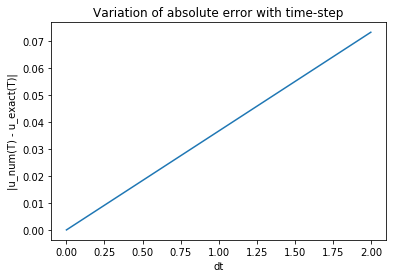


rate of convergence =  nan


C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mshai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [11]:
dataBE = generateError(uo,tInitial,tFinal,dt,1)
errorAnalysis(dataBE,1)